## Unsupervised Learning: K-Means Clustering (BaskinRobbins dataset)
* Baskin Robbins nutritional information from http://www.baskinrobbins.ca/nutritional-information/

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [40]:
print(f'pandas  version = {pd.__version__}')
print(f'numpy   version = {np.__version__}')
print(f'seaborn version = {sns.__version__}')

pandas  version = 1.5.1
numpy   version = 1.23.4
seaborn version = 0.12.1


In [41]:
df=pd.read_csv('https://github.com/prasertcbs/basic-dataset/raw/master/BaskinRobbins.tsv', sep='\t')
df.sample(10)

,Flavour,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g),Sugar Alcohol (g)
58,Splish Splash,70,0.5,0.0,16,12,0.5,NaN
33,Mango Sorbet,70,0.0,0.0,16,12,0.0,NaN
8,NSA Caramel Turtle Truffle,200,8.0,0.2,38,7,5.0,24.0
34,Mango Tango,230,10.0,0.4,29,24,4.0,NaN
57,Salty Caramel,160,8.0,0.3,18,15,3.0,NaN
63,Vanilla Pomegranate Parfait Frozen Yogurt,140,5.0,0.1,20,14,3.0,NaN
25,Gold Medal Ribbon,240,12.0,0.4,30,23,4.0,NaN
14,Chocolate Fudge,150,9.0,0.3,17,12,3.0,NaN
50,Rainbow Sherbet,130,2.0,0.1,27,20,1.0,NaN
28,Jamoca Almond Fudge,260,15.0,0.4,28,20,5.0,NaN


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Flavour            70 non-null     object 
 1   Calories           70 non-null     int64  
 2   Total Fat (g)      70 non-null     float64
 3   Trans Fat (g)      70 non-null     float64
 4   Carbohydrates (g)  70 non-null     int64  
 5   Sugars (g)         70 non-null     int64  
 6   Protein (g)        70 non-null     float64
 7   Sugar Alcohol (g)  3 non-null      float64
dtypes: float64(4), int64(3), object(1)
memory usage: 4.5+ KB


In [43]:
df.drop(columns=['Sugar Alcohol (g)'], inplace=True)
df.head()

,Flavour,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g)
0,Bananas Foster,160,8.0,0.2,20,16,2.0
1,Baseball Nut,160,9.0,0.2,19,13,3.0
2,Beavertails Pastry,170,9.0,0.3,21,15,3.0
3,Blackberry Frozen Yogurt,120,4.0,0.1,17,16,3.0
4,Blue Raspberry Sherbet,130,2.0,0.1,26,20,2.0


In [44]:
df.columns

Index(['Flavour', 'Calories', 'Total Fat (g)', 'Trans Fat (g)',
       'Carbohydrates (g)', 'Sugars (g)', 'Protein (g)'],
      dtype='object')

In [45]:
cols=['Calories', 'Total Fat (g)', 'Trans Fat (g)', 'Carbohydrates (g)', 'Sugars (g)', 'Protein (g)']

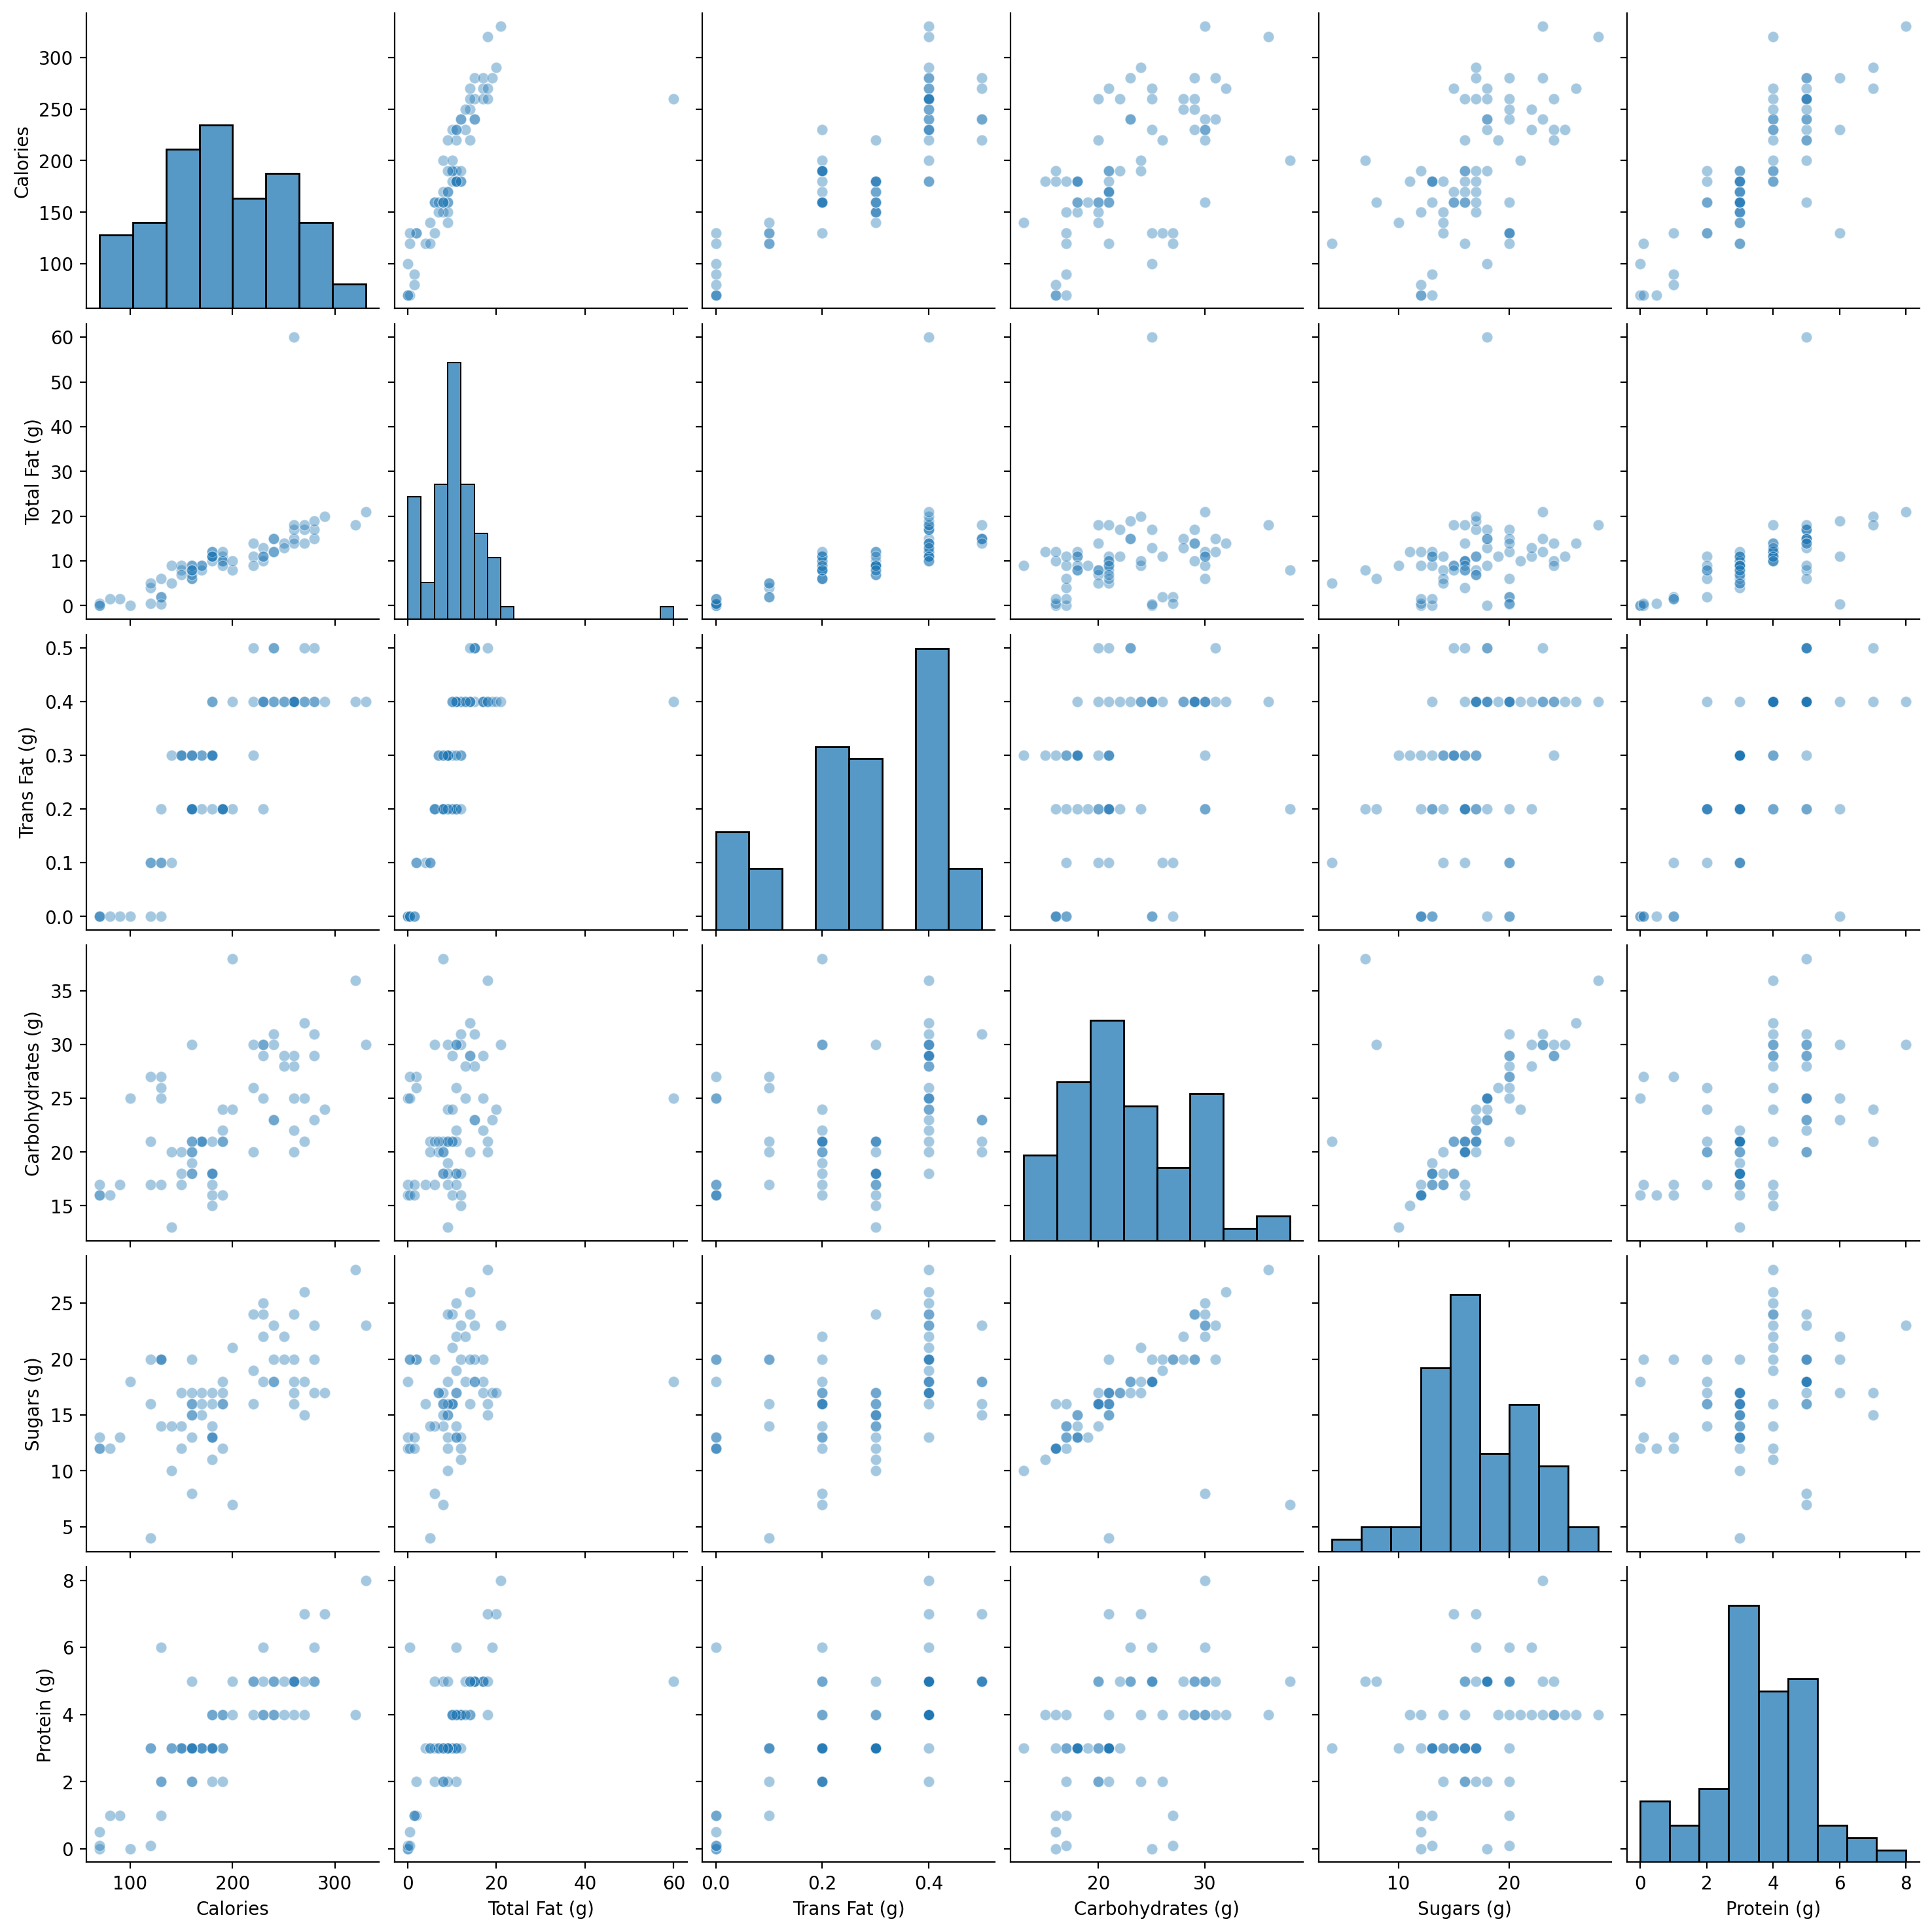

In [46]:
sns.pairplot(df, vars=cols, 
             plot_kws={'alpha': .4});

# Scikit-learn: KMeans Clustering

In [47]:
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [48]:
df.columns

Index(['Flavour', 'Calories', 'Total Fat (g)', 'Trans Fat (g)',
       'Carbohydrates (g)', 'Sugars (g)', 'Protein (g)'],
      dtype='object')

In [49]:
cols=['Calories', 'Total Fat (g)', 'Trans Fat (g)', 'Carbohydrates (g)', 'Sugars (g)', 'Protein (g)']
## z-score
scaler = preprocessing.StandardScaler() # create StandardScaler instance
z=scaler.fit_transform(df[cols]) # calc z-score
z[:5].round(4) # 2D numpy array

array([[-0.5182, -0.3248, -0.5335, -0.5358, -0.2048, -0.94  ],
       [-0.5182, -0.1981, -0.5335, -0.7206, -0.8767, -0.3402],
       [-0.3548, -0.1981,  0.1581, -0.3511, -0.4287, -0.3402],
       [-1.1718, -0.8318, -1.2251, -1.0902, -0.2048, -0.3402],
       [-1.0084, -1.0852, -1.2251,  0.5728,  0.6911, -0.94  ]])

In [50]:
## Yeo-Johnson transformation (preferable)
pt = preprocessing.PowerTransformer(method='yeo-johnson', standardize=True) # support only positive value
mat = pt.fit_transform(df[cols])
mat[:5].round(4)

array([[-0.4998, -0.1914, -0.644 , -0.4474, -0.2191, -0.9432],
       [-0.4998, -0.0397, -0.644 , -0.6723, -0.8836, -0.3465],
       [-0.3343, -0.0397,  0.0461, -0.2353, -0.4421, -0.3465],
       [-1.1757, -0.92  , -1.2227, -1.1663, -0.2191, -0.3465],
       [-1.0044, -1.417 , -1.2227,  0.6729,  0.6865, -0.9432]])

In [51]:
bc_cols = [f'bc_{c}' for c in cols]
bc_cols

['bc_Calories',
 'bc_Total Fat (g)',
 'bc_Trans Fat (g)',
 'bc_Carbohydrates (g)',
 'bc_Sugars (g)',
 'bc_Protein (g)']

In [52]:
z_cols = [f'z_{c}' for c in cols]
z_cols

['z_Calories',
 'z_Total Fat (g)',
 'z_Trans Fat (g)',
 'z_Carbohydrates (g)',
 'z_Sugars (g)',
 'z_Protein (g)']

In [53]:
ds=pd.concat([df, pd.DataFrame(mat, columns=bc_cols), pd.DataFrame(z, columns=z_cols)], axis='columns')
ds.head()

,Flavour,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g),bc_Calories,bc_Total Fat (g),bc_Trans Fat (g),bc_Carbohydrates (g),bc_Sugars (g),bc_Protein (g),z_Calories,z_Total Fat (g),z_Trans Fat (g),z_Carbohydrates (g),z_Sugars (g),z_Protein (g)
0,Bananas Foster,160,8.0,0.2,20,16,2.0,-0.499816,-0.191406,-0.643961,-0.447402,-0.219051,-0.943181,-0.518194,-0.324811,-0.533530,-0.535844,-0.204771,-0.94002
1,Baseball Nut,160,9.0,0.2,19,13,3.0,-0.499816,-0.039724,-0.643961,-0.672273,-0.883644,-0.346462,-0.518194,-0.198073,-0.533530,-0.720618,-0.876675,-0.34019
2,Beavertails Pastry,170,9.0,0.3,21,15,3.0,-0.334348,-0.039724,0.046059,-0.235261,-0.442092,-0.346462,-0.354799,-0.198073,0.158083,-0.351070,-0.428739,-0.34019
3,Blackberry Frozen Yogurt,120,4.0,0.1,17,16,3.0,-1.175713,-0.919995,-1.222738,-1.166310,-0.219051,-0.346462,-1.171772,-0.831762,-1.225143,-1.090165,-0.204771,-0.34019
4,Blue Raspberry Sherbet,130,2.0,0.1,26,20,2.0,-1.004409,-1.417016,-1.222738,0.672892,0.686477,-0.943181,-1.008377,-1.085238,-1.225143,0.572799,0.691102,-0.94002


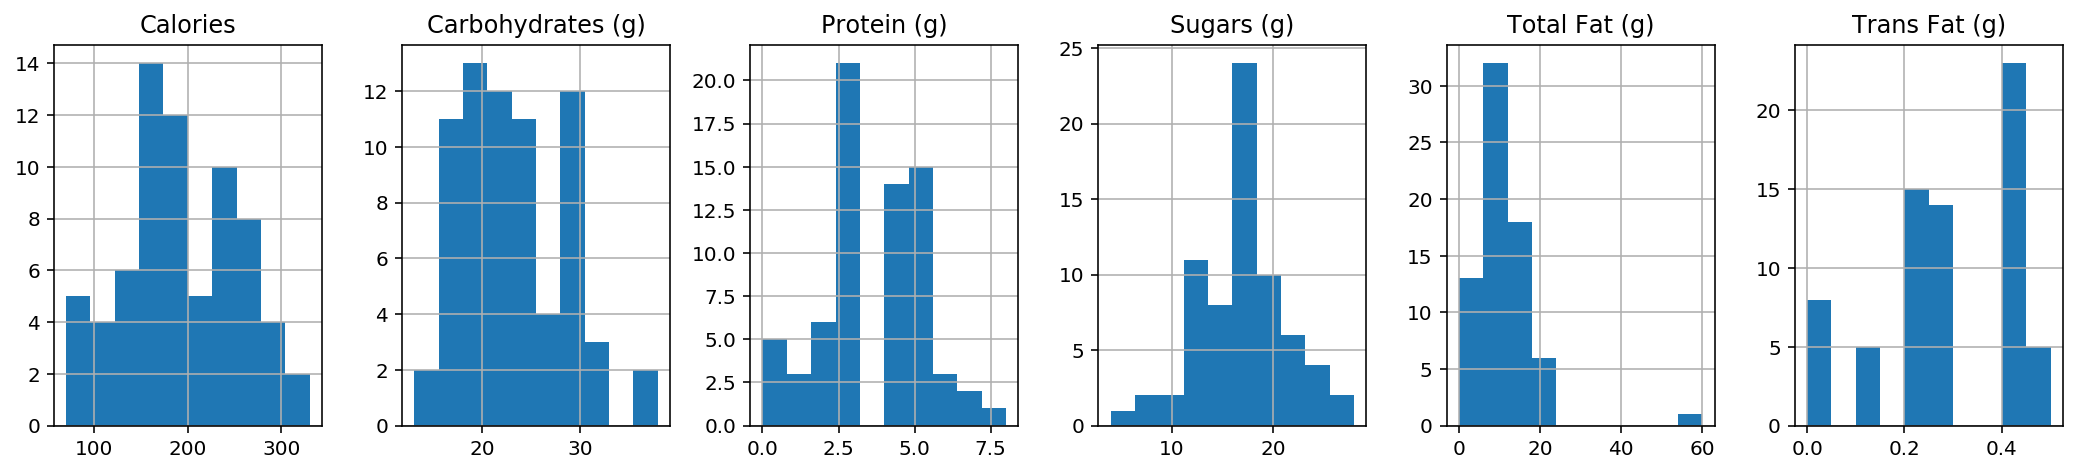

In [16]:
ds[cols].hist(layout=(1, len(cols)), figsize=(3*len(cols), 3.5));

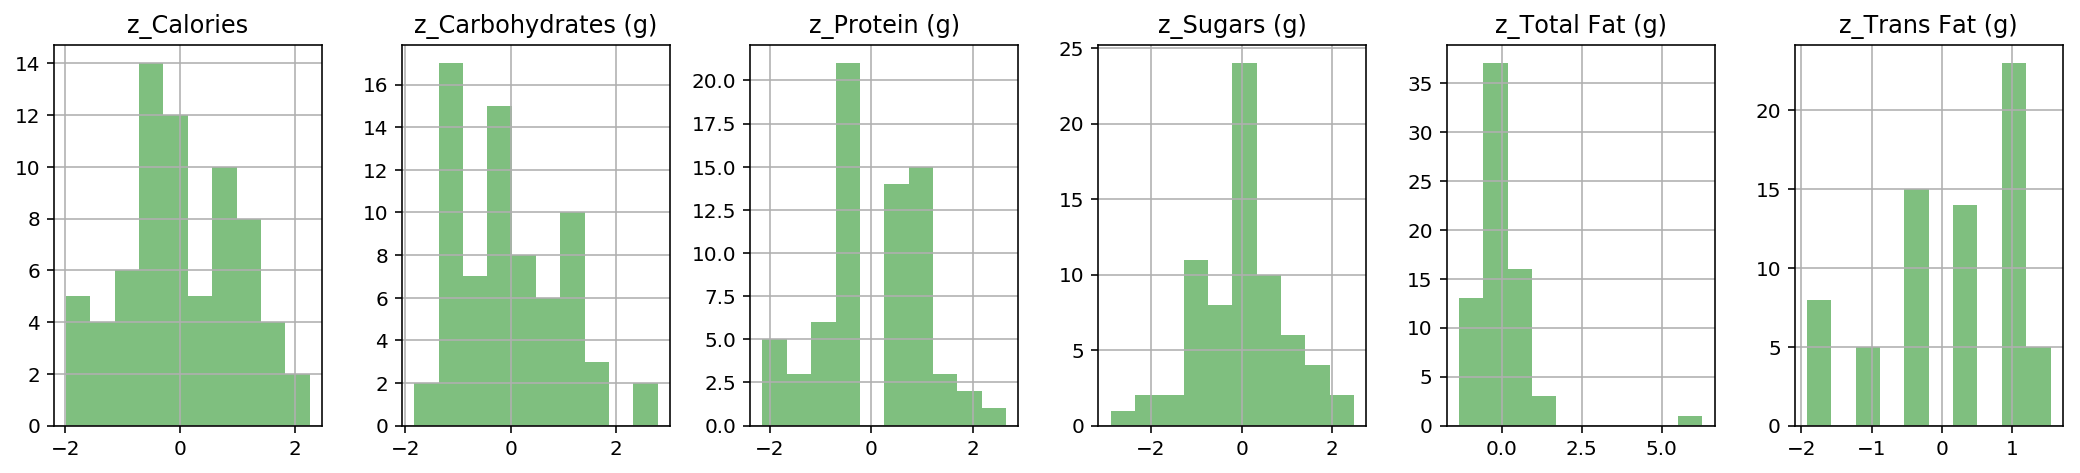

In [17]:
ds[z_cols].hist(layout=(1, len(cols)), figsize=(3*len(cols), 3.5), color='green', alpha=.5);

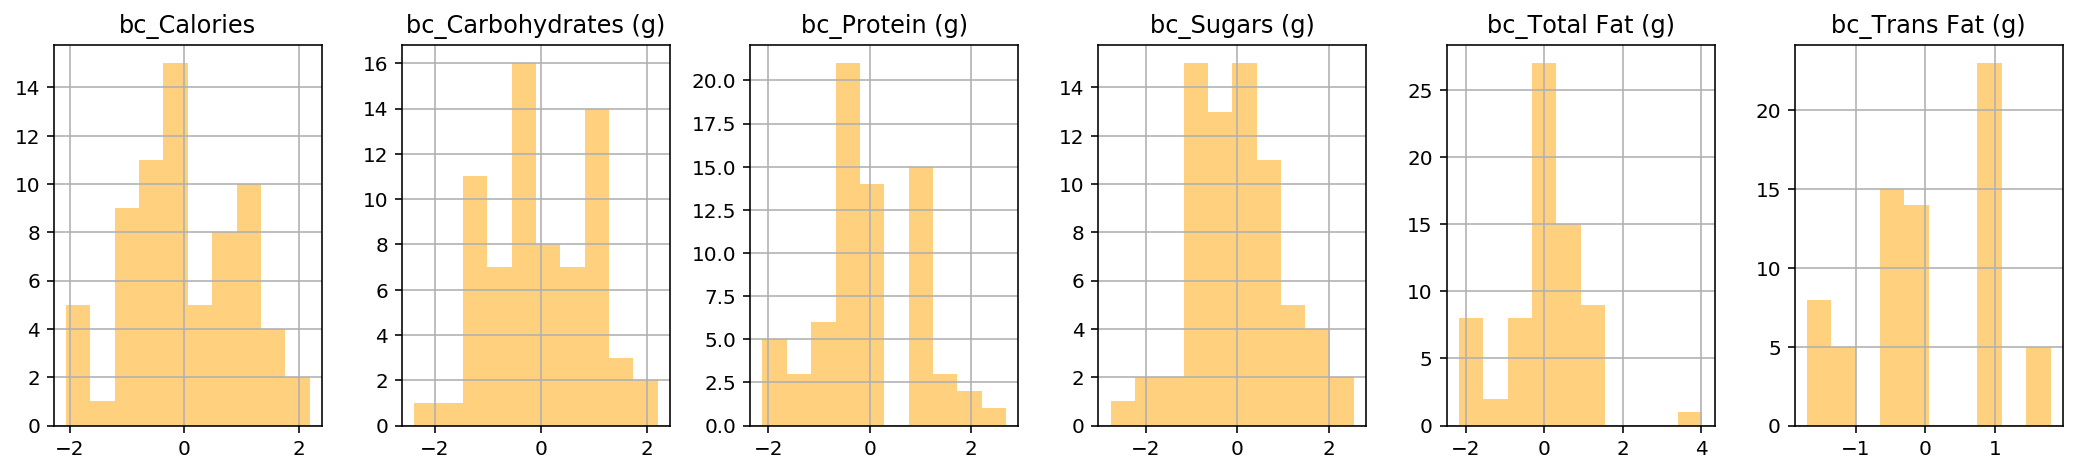

In [18]:
ds[bc_cols].hist(layout=(1, len(cols)), figsize=(3*len(cols), 3.5), color='orange', alpha=.5);

In [19]:
X=pd.DataFrame(mat, columns=cols) ## power transformation (preferable)
# X=pd.DataFrame(z, columns=cols) ## z-score
X.head()

,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g)
0,-0.499816,-0.191406,-0.643961,-0.447402,-0.219051,-0.943181
1,-0.499816,-0.039724,-0.643961,-0.672273,-0.883644,-0.346462
2,-0.334348,-0.039724,0.046059,-0.235261,-0.442092,-0.346462
3,-1.175713,-0.919995,-1.222738,-1.166310,-0.219051,-0.346462
4,-1.004409,-1.417016,-1.222738,0.672892,0.686477,-0.943181


---

## scatter matrix with transformed data

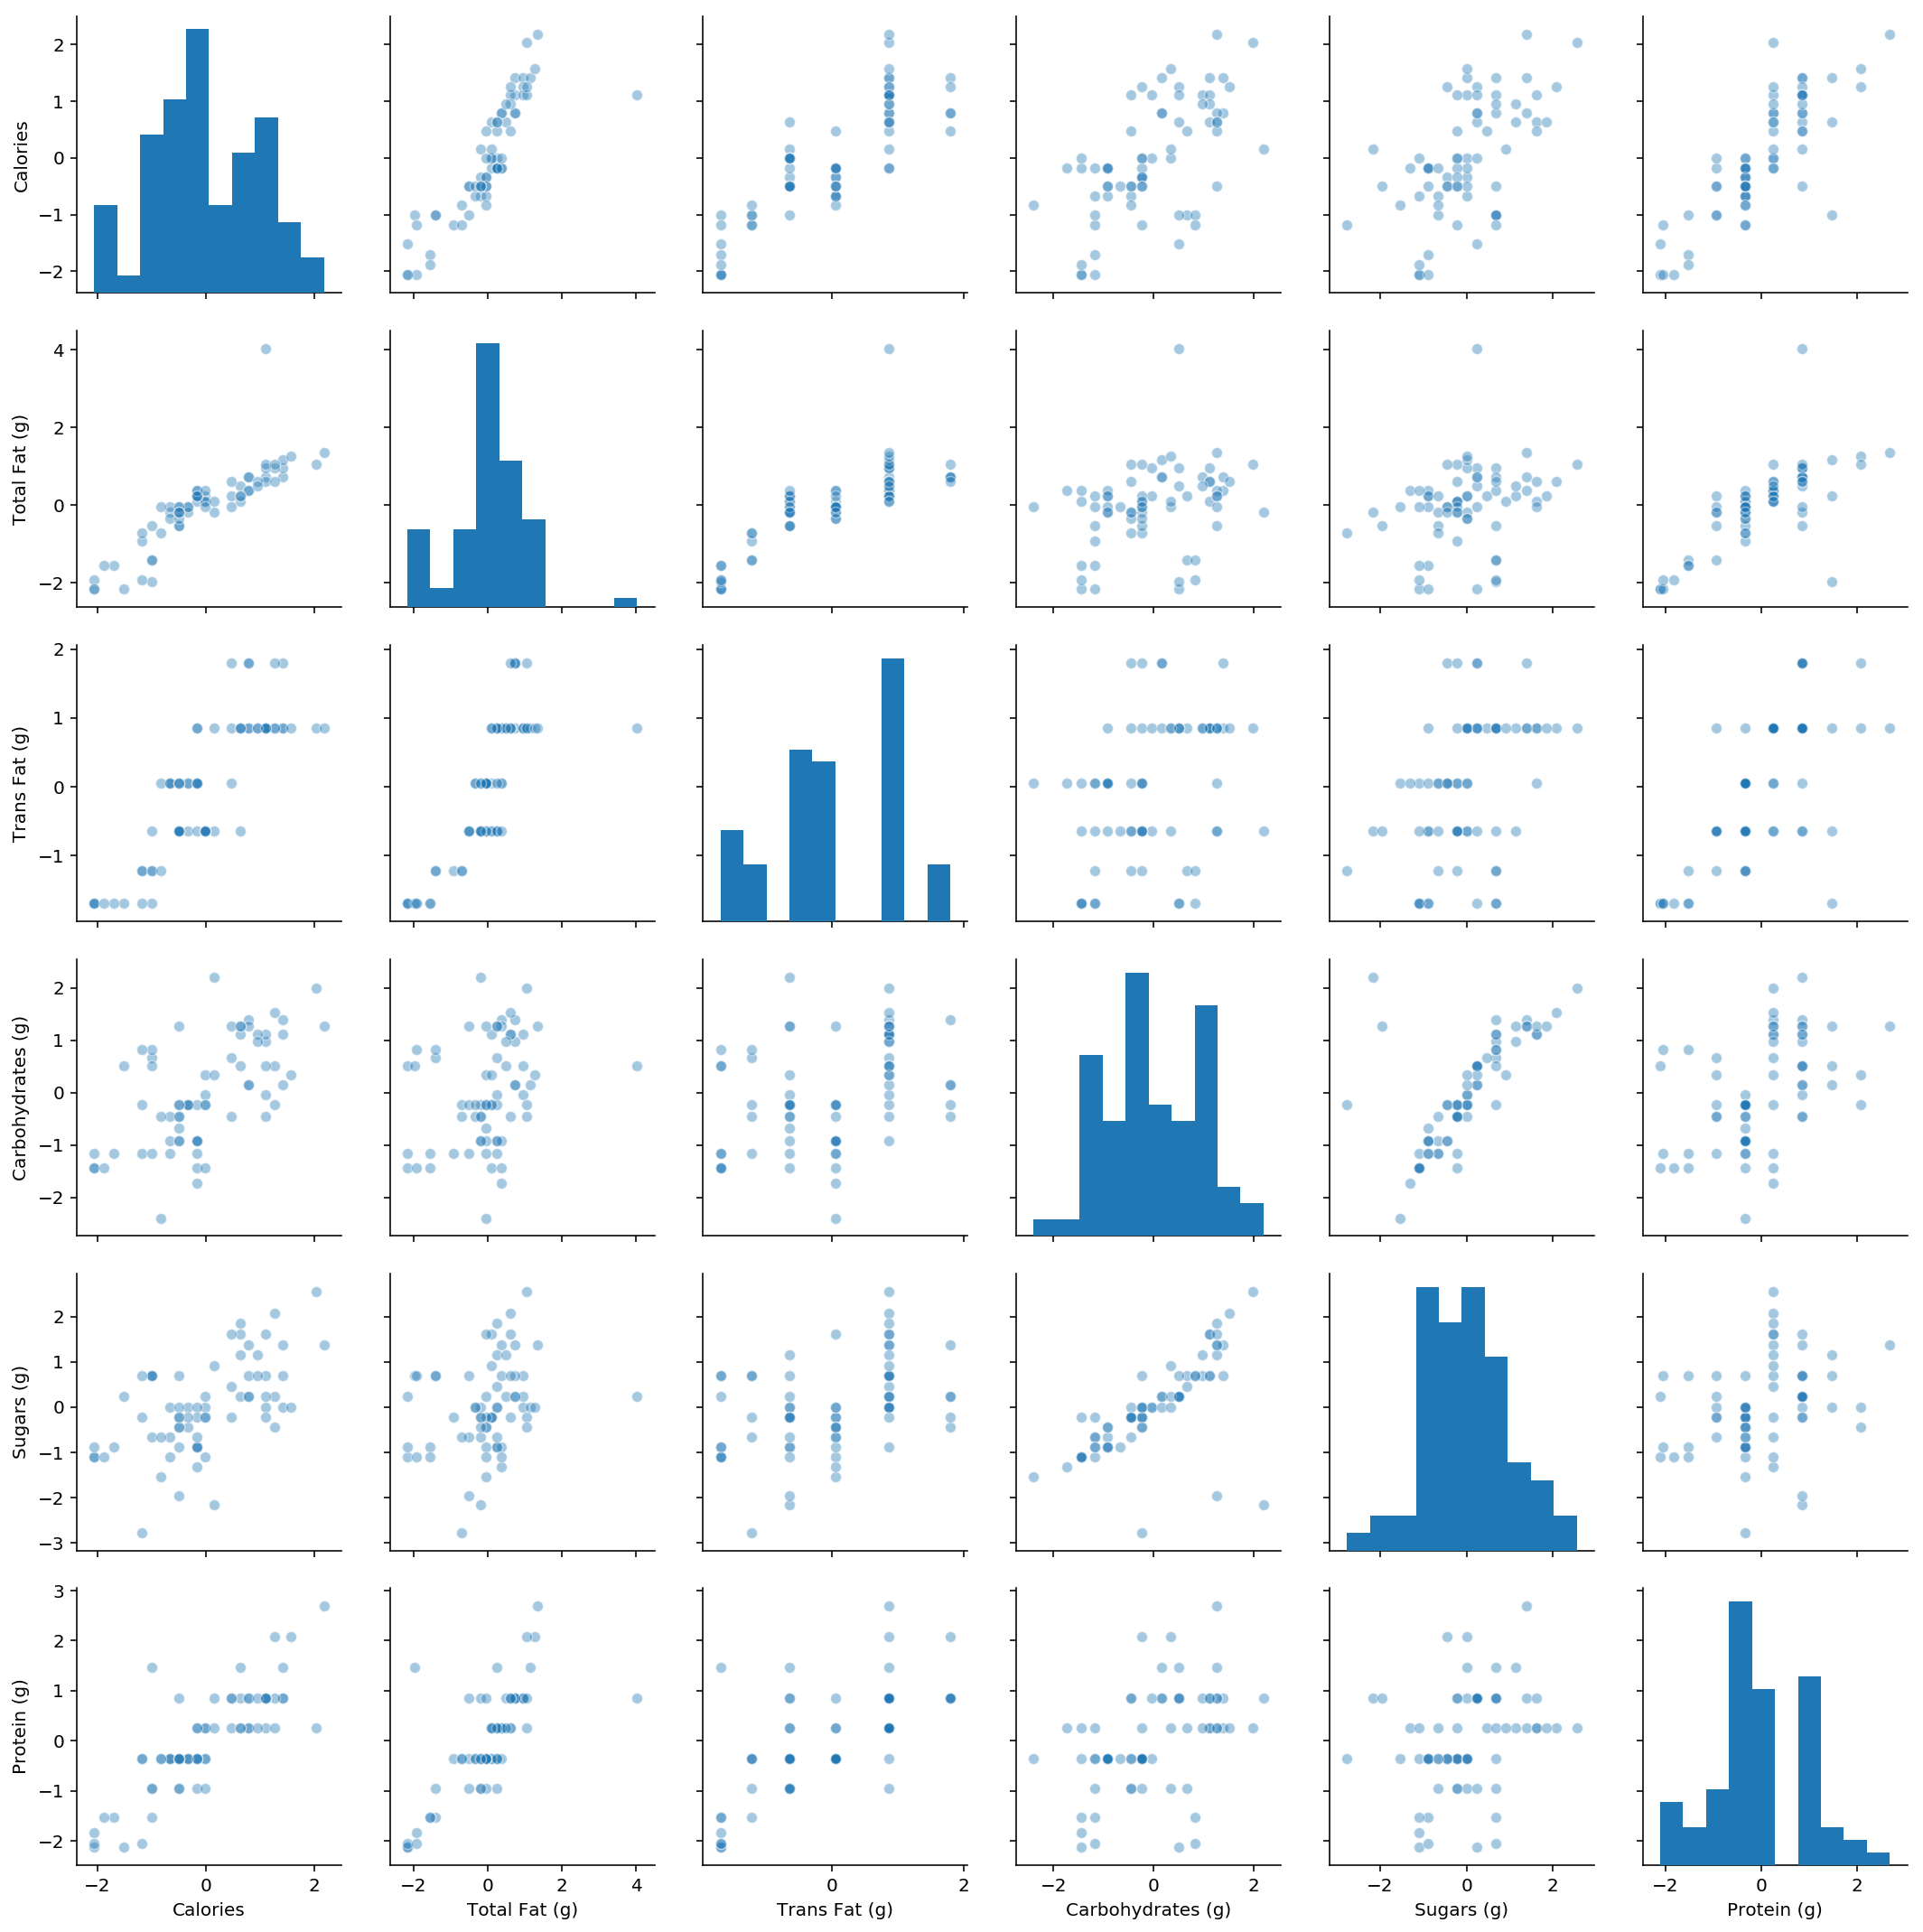

In [20]:
sns.pairplot(X, 
             plot_kws={'alpha': .4});

# Scikit-learn: KMeans Clustering

In [21]:
from sklearn.cluster import KMeans

## Optimal number of clusters

In [22]:
ssd=[]
for k in range(2, 10):
    m=KMeans(n_clusters=k)
    m.fit(X)
    ssd.append([k, m.inertia_])
ssd

[[2, 212.64279113095122],
 [3, 155.993731513363],
 [4, 131.65474381217098],
 [5, 111.88241989188094],
 [6, 90.57423747109002],
 [7, 79.3322012977338],
 [8, 70.45750441200298],
 [9, 64.43253014057652]]

In [23]:
xy=np.array(ssd)
print(xy)

[[  2.         212.64279113]
 [  3.         155.99373151]
 [  4.         131.65474381]
 [  5.         111.88241989]
 [  6.          90.57423747]
 [  7.          79.3322013 ]
 [  8.          70.45750441]
 [  9.          64.43253014]]


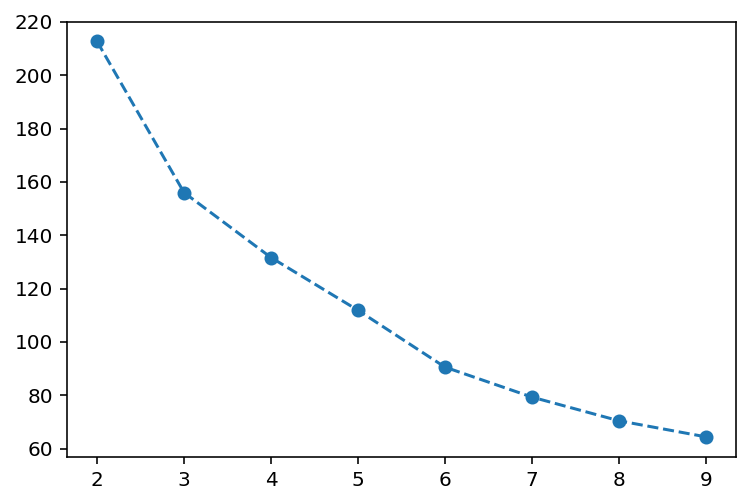

In [24]:
plt.plot(xy[:, 0], xy[:, 1], linestyle='--', marker='o')
# plt.plot(xy[:, 0], xy[:, 1], '--o')

In [25]:
dd=pd.DataFrame(ssd, columns=['k', 'ssd'])
dd

,k,ssd
0,2,212.642791
1,3,155.993732
2,4,131.654744
3,5,111.882420
4,6,90.574237
5,7,79.332201
6,8,70.457504
7,9,64.432530


In [26]:
dd['pct_chg']=dd['ssd'].pct_change() * 100
dd

,k,ssd,pct_chg
0,2,212.642791,NaN
1,3,155.993732,-26.640480
2,4,131.654744,-15.602542
3,5,111.882420,-15.018315
4,6,90.574237,-19.045157
5,7,79.332201,-12.411958
6,8,70.457504,-11.186752
7,9,64.432530,-8.551217


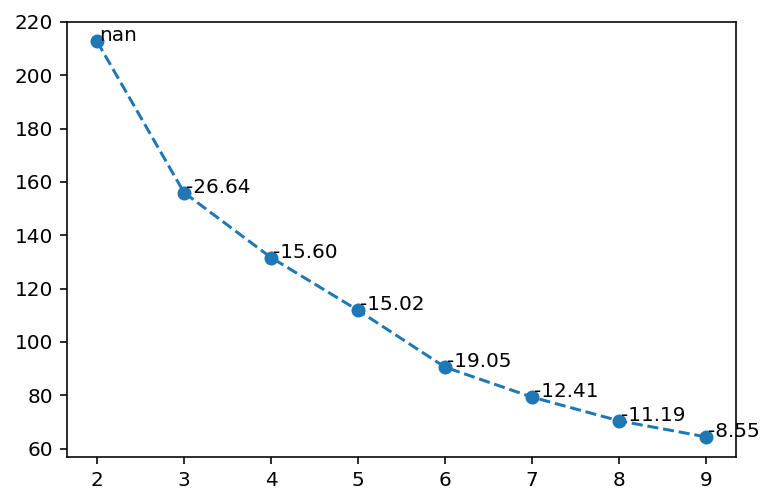

In [27]:
plt.plot(dd['k'], dd['ssd'], linestyle='--', marker='o')
# plt.plot(xy[:, 0], xy[:, 1], '--o')
for index, row in dd.iterrows():
    plt.text(row['k']+.02, row['ssd']+.02, f'{row["pct_chg"]:.2f}', fontsize=10)

## fit the model

In [28]:
model = KMeans(n_clusters=3)
model
# X=df[cols]

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [29]:
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [30]:
model.cluster_centers_.round(4)

array([[-0.4273, -0.1641, -0.3658, -0.5285, -0.5867, -0.2359],
       [ 1.0208,  0.7778,  0.9435,  0.7589,  0.7909,  0.8394],
       [-1.609 , -1.8181, -1.5943, -0.4232, -0.3092, -1.7464]])

In [31]:
model.transform(X) # the distance between each point and centroid

array([[0.85167988, 3.38003665, 2.33097547],
       [0.46815905, 3.42920514, 2.76549545],
       [0.55931981, 2.68797166, 3.08075439],
       [1.55565159, 4.30496741, 1.91117126],
       [2.49033093, 4.09969758, 1.87148142],
       [0.62632963, 3.3020949 , 2.92385128],
       [2.5412567 , 5.17795727, 3.09713587],
       [0.73184698, 2.88230237, 2.69595327],
       [3.40078275, 3.87618946, 4.87738341],
       [2.29180995, 1.02624737, 4.51561574],
       [1.01198877, 2.55318582, 3.14880494],
       [2.45044488, 0.78263417, 4.93449062],
       [3.05327085, 1.21127176, 5.58668468],
       [4.20302682, 1.28332786, 6.33516112],
       [0.96271001, 3.60787468, 3.14359298],
       [3.41995688, 0.58293092, 5.74558114],
       [0.74416044, 3.35078705, 3.12045355],
       [3.50679976, 5.5930566 , 1.20048404],
       [0.74779602, 2.72866365, 3.0275637 ],
       [2.92218934, 0.68691377, 5.46537159],
       [2.9725733 , 0.99156408, 4.98760606],
       [1.63186522, 2.54910642, 3.61906141],
       [1.

In [32]:
model.labels_

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 2, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 2, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 2, 1, 0, 1, 0, 1, 1, 0, 2, 1, 2, 2, 1, 0, 0, 1,
       2, 2, 0, 1], dtype=int32)

## sense making about each cluster

In [33]:
df['cluster']=model.labels_
df.head()

,Flavour,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g),cluster
0,Bananas Foster,160,8.0,0.2,20,16,2.0,0
1,Baseball Nut,160,9.0,0.2,19,13,3.0,0
2,Beavertails Pastry,170,9.0,0.3,21,15,3.0,0
3,Blackberry Frozen Yogurt,120,4.0,0.1,17,16,3.0,0
4,Blue Raspberry Sherbet,130,2.0,0.1,26,20,2.0,2


In [34]:
df.groupby('cluster').describe().T

cluster                           0           1           2
Calories          count   33.000000   28.000000    9.000000
                  mean   164.545455  254.642857   95.555556
                  std     21.373305   29.749839   25.549516
                  min    120.000000  200.000000   70.000000
                  25%    150.000000  230.000000   70.000000
                  50%    160.000000  255.000000   90.000000
                  75%    180.000000  270.000000  120.000000
                  max    200.000000  330.000000  130.000000
Total Fat (g)     count   33.000000   28.000000    9.000000
                  mean     8.436364   16.178571    0.888889
                  std      2.570727    9.161326    0.857969
                  min      0.400000    9.000000    0.000000
                  25%      7.000000   12.000000    0.000000
                  50%      9.000000   14.500000    0.500000
                  75%     10.000000   17.250000    1.500000
                  max     12.000000   60.000000    2.000000
Trans Fat (g)     count   33.000000   28.000000    9.000000
                  mean     0.236364    0.407143    0.022222
                  std      0.085944    0.060422    0.044096
                  min      0.000000    0.200000    0.000000
                  25%      0.200000    0.400000    0.000000
                  50%      0.200000    0.400000    0.000000
                  75%      0.300000    0.400000    0.000000
                  max      0.400000    0.500000    0.100000
Carbohydrates (g) count   33.000000   28.000000    9.000000
                  mean    20.090909   26.892857   20.777778
                  std      4.488622    4.030801    5.238745
                  min     13.000000   20.000000   16.000000
                  25%     18.000000   23.750000   16.000000
                  50%     20.000000   28.000000   17.000000
                  75%     21.000000   30.000000   26.000000
                  max     38.000000   36.000000   27.000000
Sugars (g)        count   33.000000   28.000000    9.000000
                  mean    14.303030   20.428571   15.555556
                  std      3.459451    3.382182    3.811532
                  min      4.000000   15.000000   12.000000
                  25%     13.000000   18.000000   12.000000
                  50%     15.000000   20.000000   13.000000
                  75%     16.000000   23.000000   20.000000
                  max     20.000000   28.000000   20.000000
Protein (g)       count   33.000000   28.000000    9.000000
                  mean     3.181818    4.964286    0.633333
                  std      0.882275    1.035737    0.676387
                  min      2.000000    4.000000    0.000000
                  25%      3.000000    4.000000    0.100000
                  50%      3.000000    5.000000    0.500000
                  75%      3.000000    5.000000    1.000000
                  max      6.000000    8.000000    2.000000

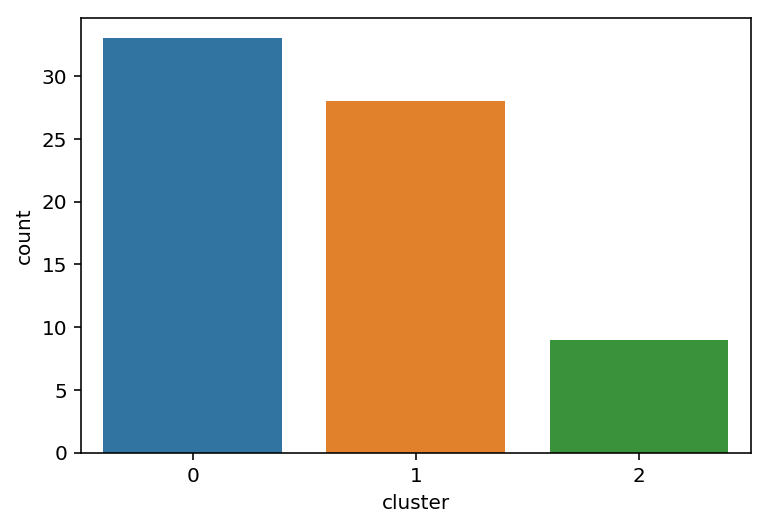

In [35]:
sns.countplot(x='cluster', data=df);

In [36]:
df.columns

Index(['Flavour', 'Calories', 'Total Fat (g)', 'Trans Fat (g)',
       'Carbohydrates (g)', 'Sugars (g)', 'Protein (g)', 'cluster'],
      dtype='object')

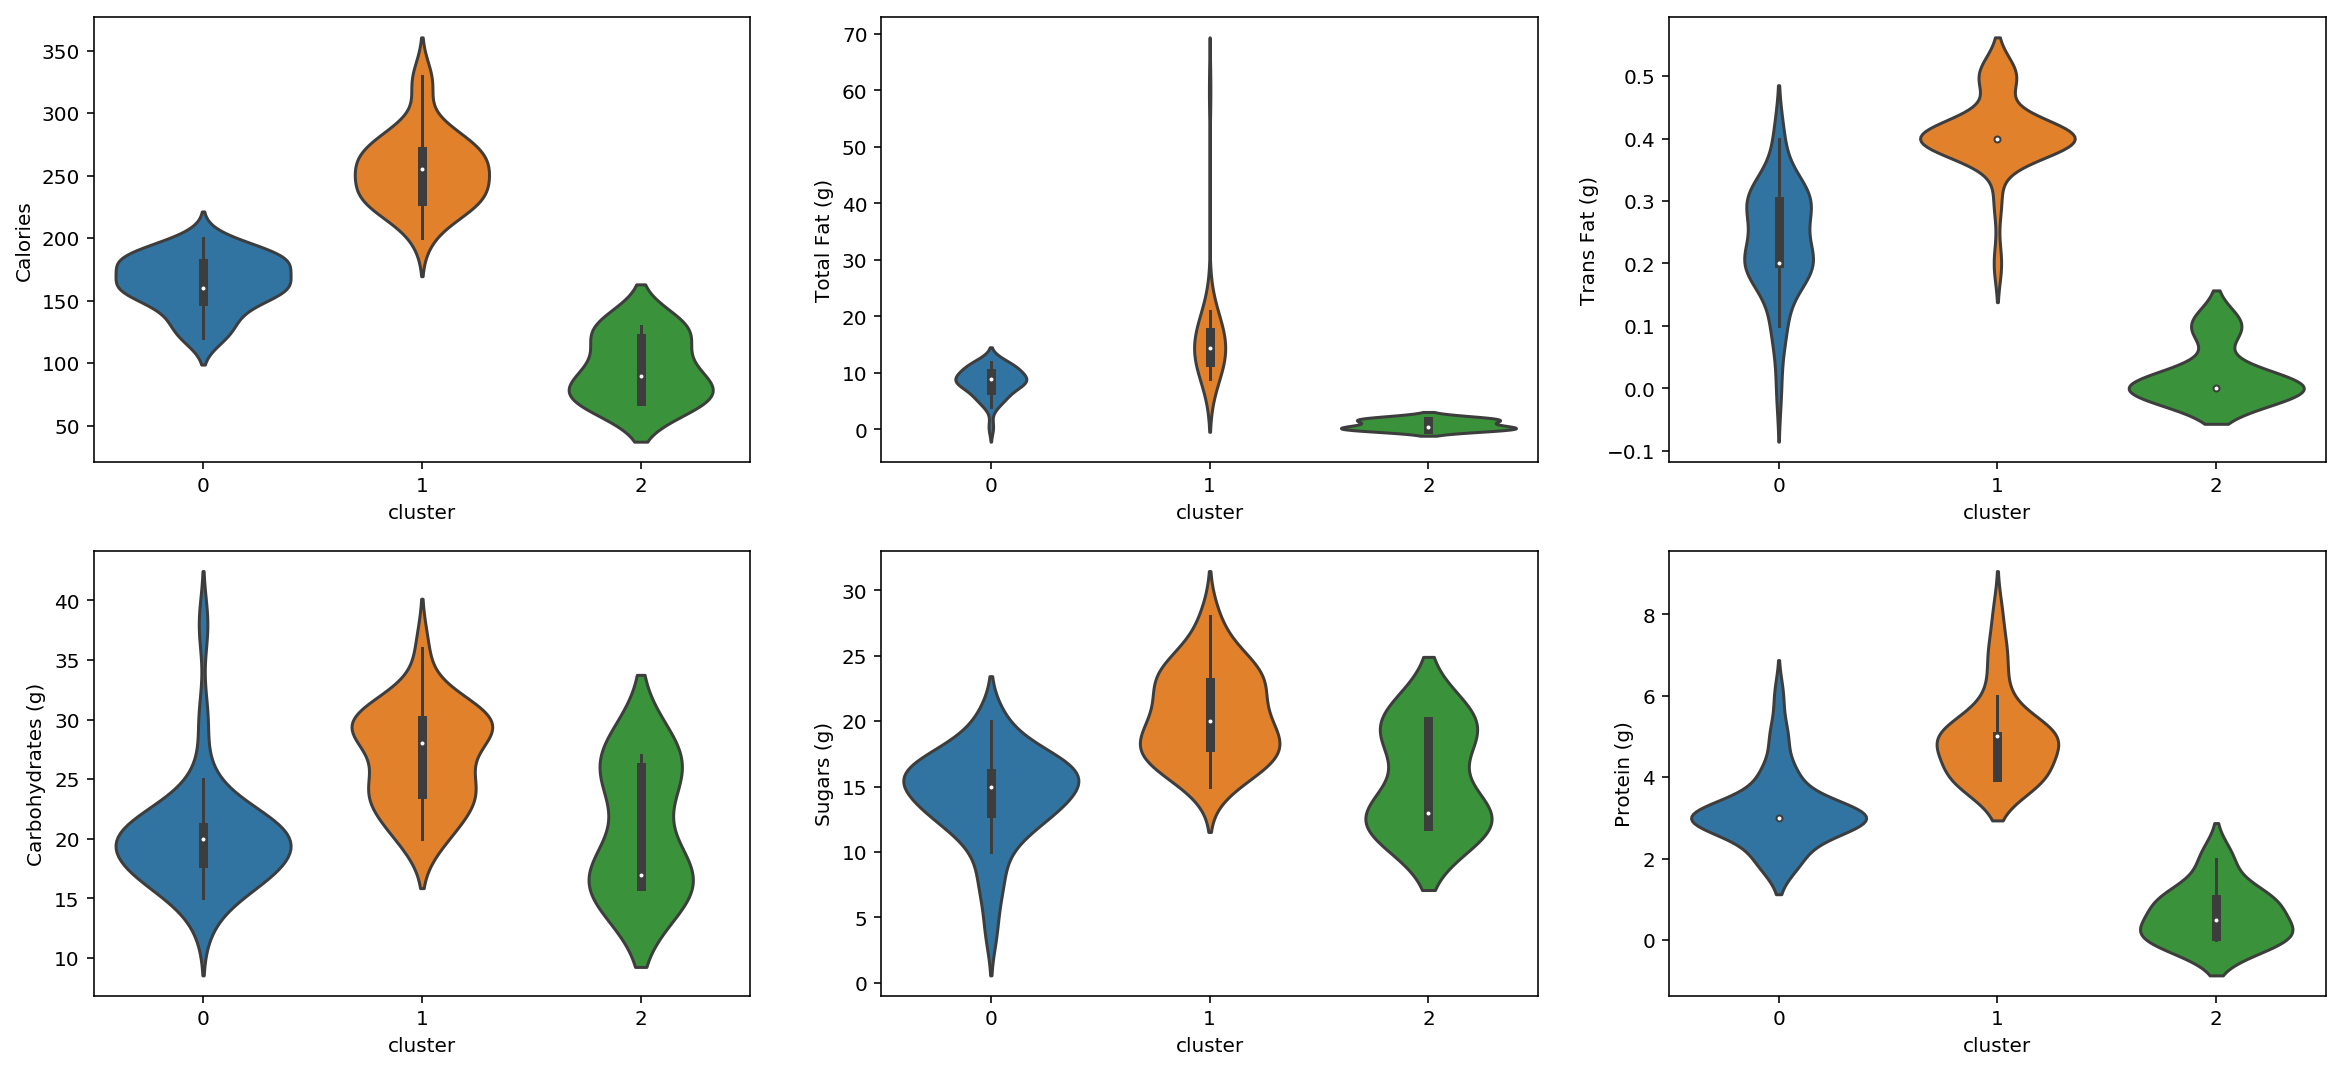

In [37]:
cols=['Calories', 'Total Fat (g)', 'Trans Fat (g)', 'Carbohydrates (g)', 'Sugars (g)', 'Protein (g)']
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 9))
ax=ax.ravel()
for i, col in enumerate(cols):
    sns.violinplot(x='cluster', y=col, data=df, ax=ax[i])

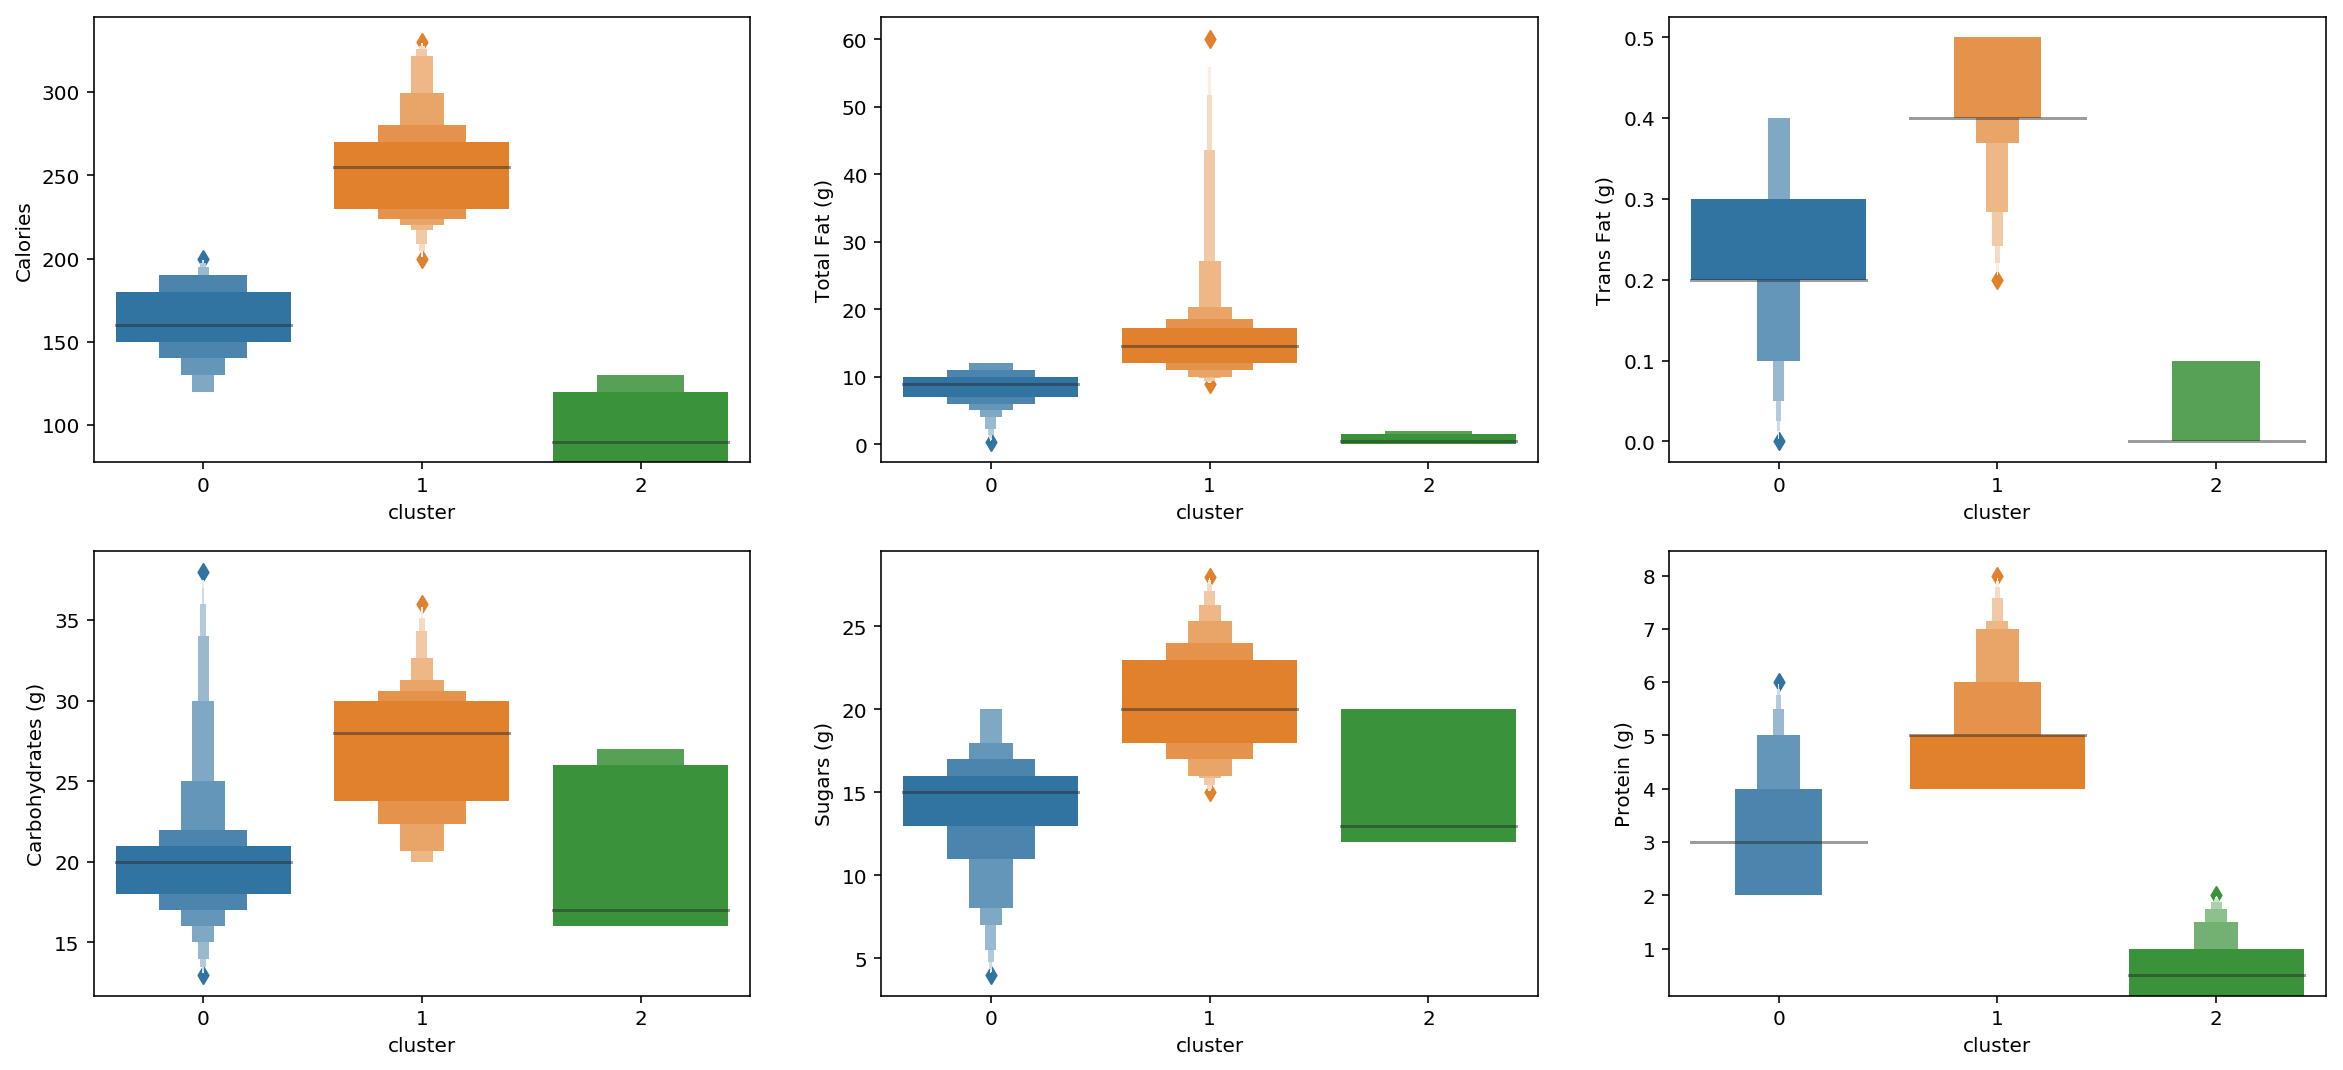

In [38]:
cols=['Calories', 'Total Fat (g)', 'Trans Fat (g)', 'Carbohydrates (g)', 'Sugars (g)', 'Protein (g)']
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 9))
ax=ax.ravel()
for i, col in enumerate(cols):
    sns.boxenplot(x='cluster', y=col, data=df, ax=ax[i])

### raw data (no scaling)

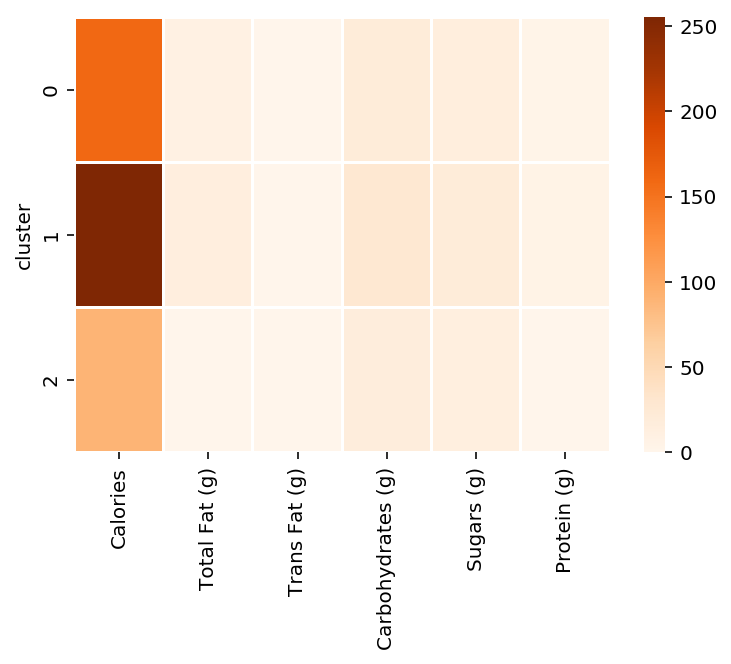

In [39]:
sns.heatmap(df.groupby('cluster').median(), cmap='Oranges', linewidths=1);

In [40]:
dx=X
dx['cluster']=model.labels_
dx.head()

,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g),cluster
0,-0.499816,-0.191406,-0.643961,-0.447402,-0.219051,-0.943181,0
1,-0.499816,-0.039724,-0.643961,-0.672273,-0.883644,-0.346462,0
2,-0.334348,-0.039724,0.046059,-0.235261,-0.442092,-0.346462,0
3,-1.175713,-0.919995,-1.222738,-1.166310,-0.219051,-0.346462,0
4,-1.004409,-1.417016,-1.222738,0.672892,0.686477,-0.943181,2


### scaled data (either z-score, power transform)

In [41]:
dx.groupby('cluster').median()

,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g)
cluster,,,,,,
0,-0.499816,-0.039724,-0.643961,-0.447402,-0.442092,-0.346462
1,1.029516,0.671798,0.857656,0.980131,0.686477,0.859598
2,-1.701140,-1.935544,-1.700508,-1.166310,-0.883644,-1.826166


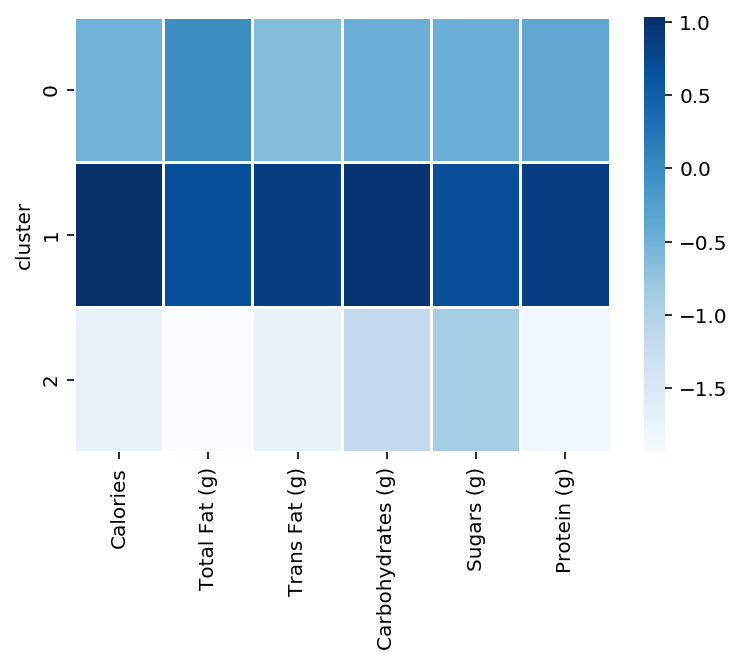

In [42]:
sns.heatmap(dx.groupby('cluster').median(), cmap="Blues", linewidths=1);

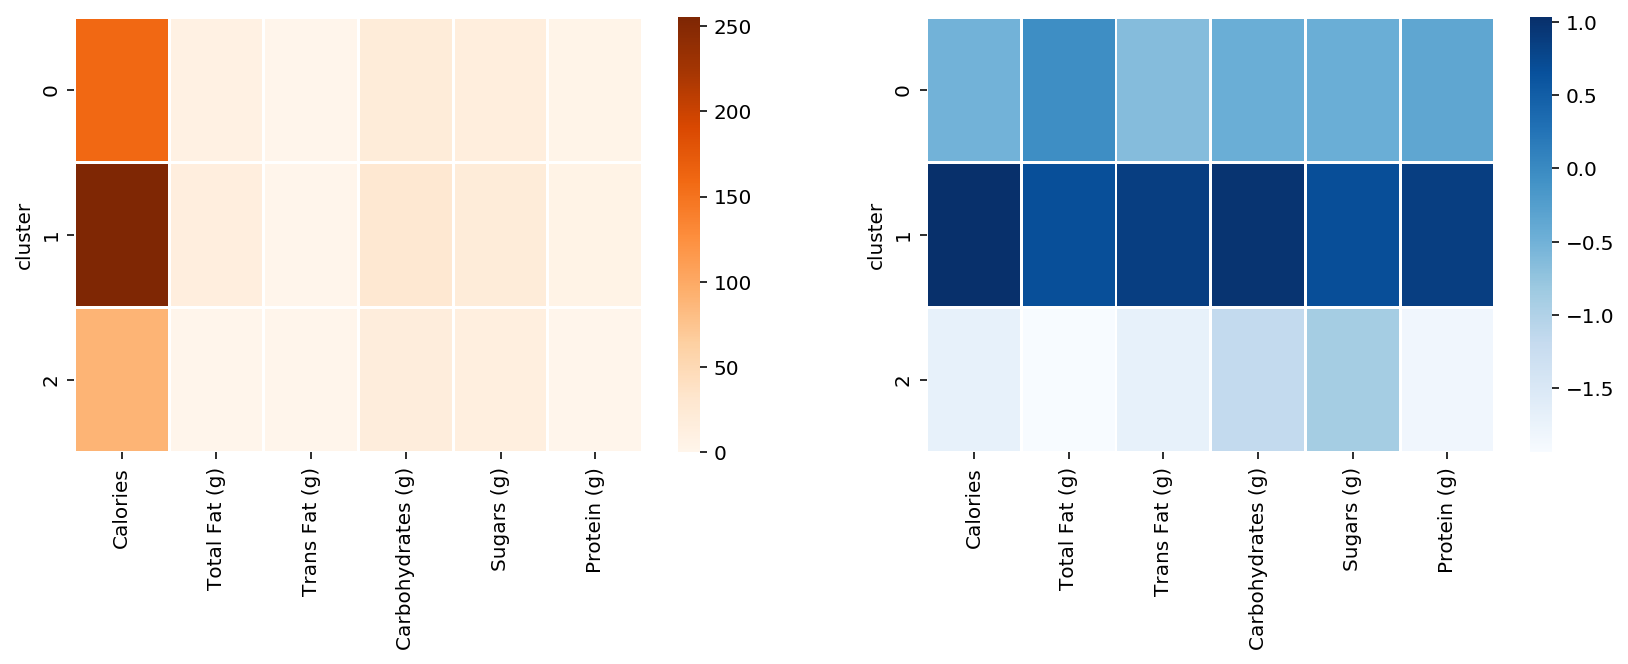

In [43]:
fig, ax = plt.subplots(ncols=2, figsize=(14, 4))
ax=ax.ravel()
sns.heatmap(df.groupby('cluster').median(), cmap="Oranges", linewidths=1, ax=ax[0]);
sns.heatmap(dx.groupby('cluster').median(), cmap="Blues", linewidths=1, ax=ax[1]);

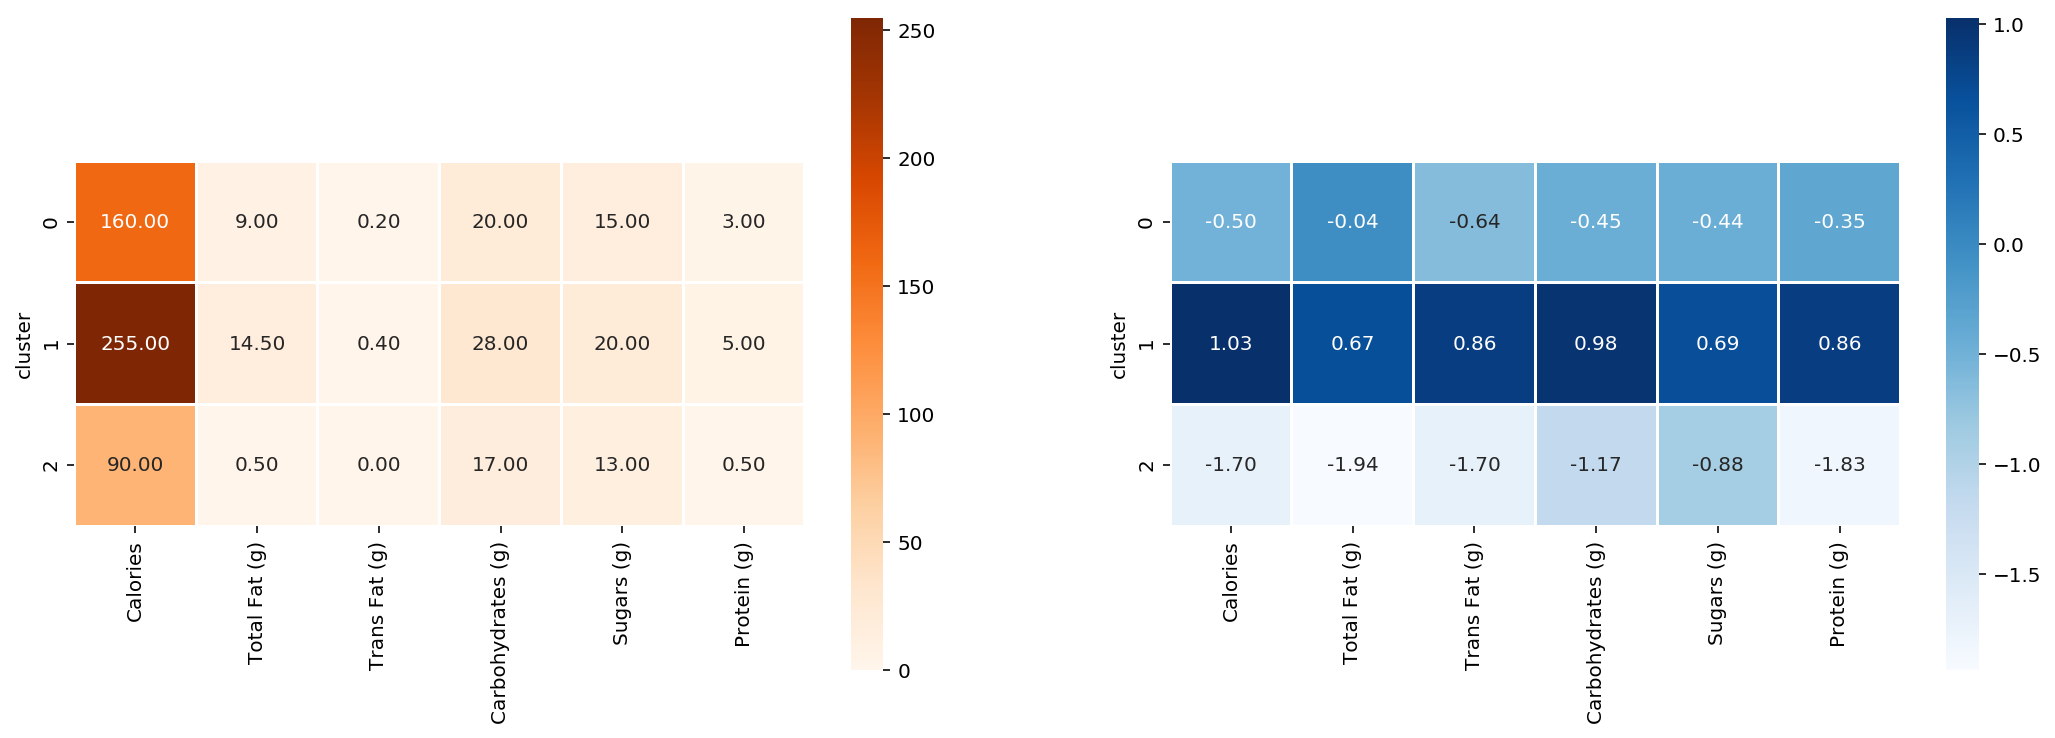

In [44]:
cols=['Calories', 'Total Fat (g)', 'Trans Fat (g)', 'Carbohydrates (g)', 'Sugars (g)', 'Protein (g)', 'cluster']
fig, ax = plt.subplots(ncols=2, figsize=(18, 6))
ax=ax.ravel()
sns.heatmap(df[cols].groupby('cluster').median(), cmap="Oranges", linewidths=1, 
            square=True, annot=True, fmt='.2f',ax=ax[0]);
sns.heatmap(dx[cols].groupby('cluster').median(), cmap="Blues", linewidths=1, 
            square=True, annot=True, fmt='.2f', ax=ax[1]);

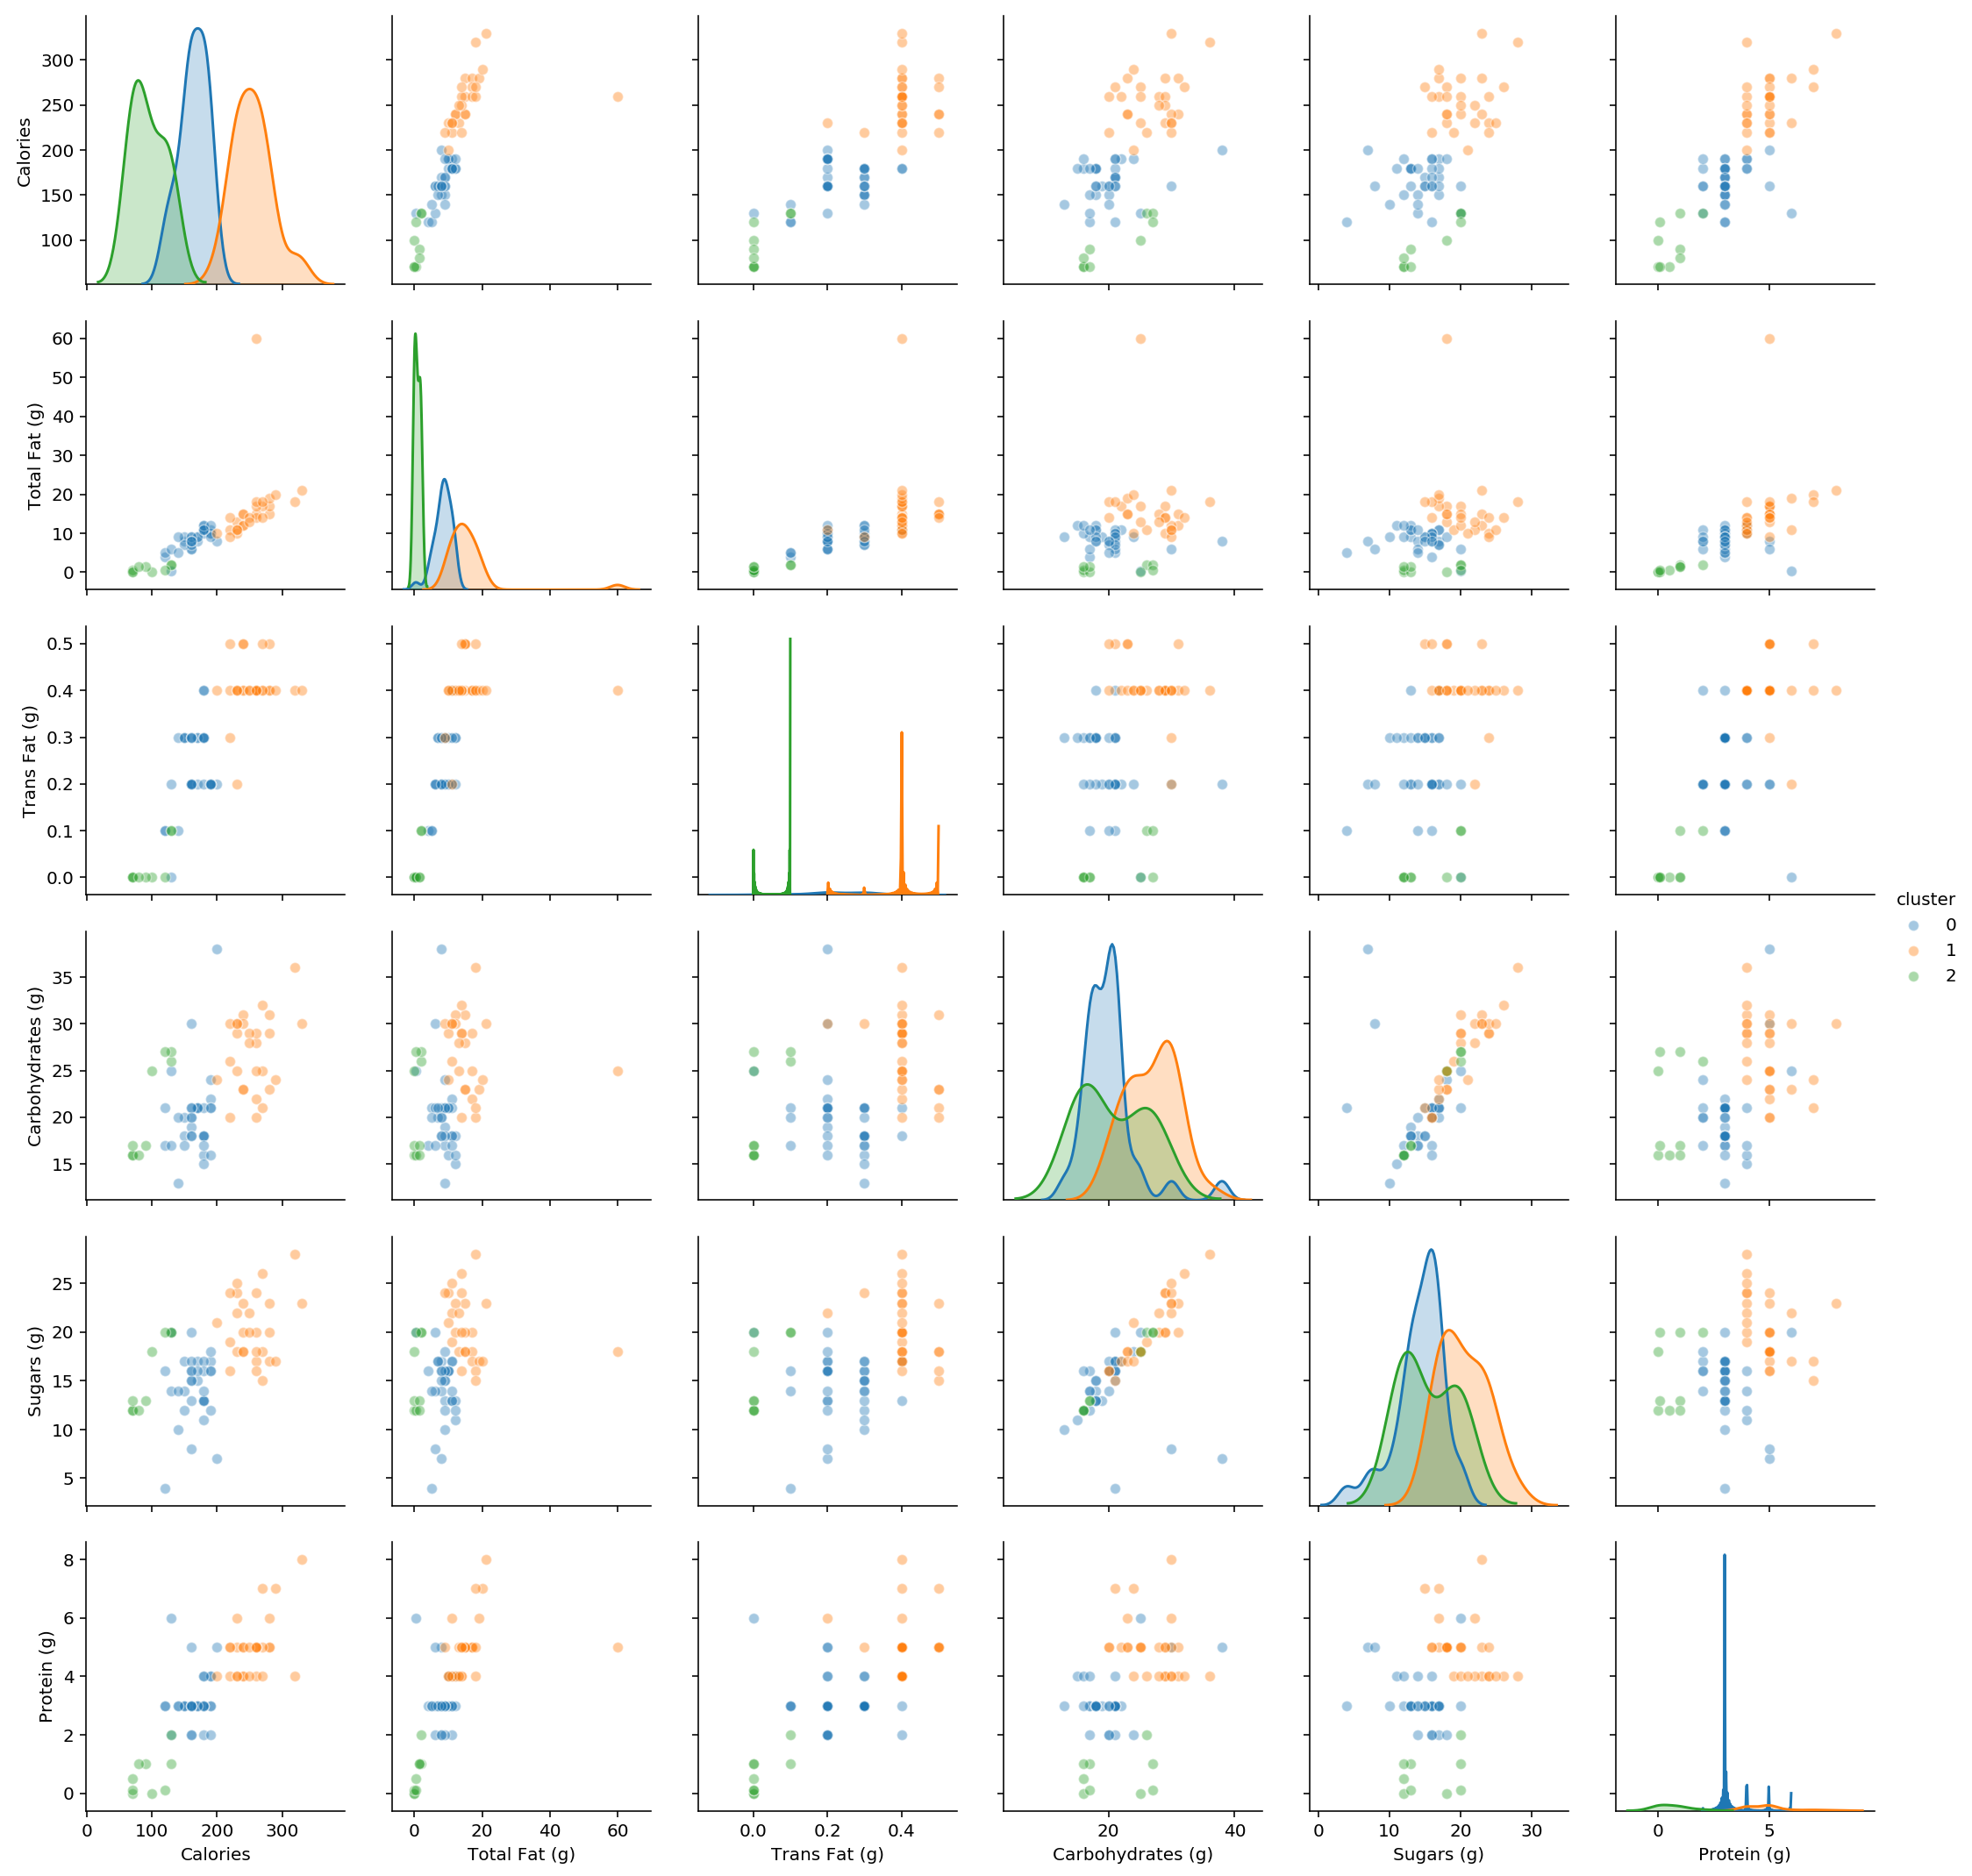

In [45]:
sns.pairplot(df, vars=['Calories', 'Total Fat (g)', 'Trans Fat (g)', 'Carbohydrates (g)', 'Sugars (g)', 'Protein (g)'], 
             hue='cluster',
             plot_kws={'alpha': .4});

In [46]:
df.groupby('cluster').head(3).sort_values('cluster')

,Flavour,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g),cluster
0,Bananas Foster,160,8.0,0.2,20,16,2.0,0
1,Baseball Nut,160,9.0,0.2,19,13,3.0,0
2,Beavertails Pastry,170,9.0,0.3,21,15,3.0,0
9,Cherries Jubilee,220,11.0,0.4,26,19,4.0,1
11,Chocolate,230,13.0,0.4,25,18,5.0,1
12,Chocolate Chip,240,15.0,0.5,23,18,5.0,1
4,Blue Raspberry Sherbet,130,2.0,0.1,26,20,2.0,2
17,Citrus Twist Ice,100,0.0,0.0,25,18,0.0,2
33,Mango Sorbet,70,0.0,0.0,16,12,0.0,2
